**DATA SCIENCE & BUSINESS ANALYTICS INTERNSHIP AT THE SPARKS FOUNDATION**

Task 1: Prediction using supervised Machine learning(ML)

To Predict the percentage of marks of the students based on the number of hours they studied

**Author - G.JAYA JYOTHSNA**


In [19]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [50]:
# Reading the Data 
df = pd.read_csv('http://bit.ly/w-data')
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [52]:
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [53]:
#number of rows and columns
df.shape

(25, 2)

In [51]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [27]:
# Check if there any null value in the Dataset
data.isnull == True

False

**There is no null value in the given Dataset so, we can now visualize our Data.**



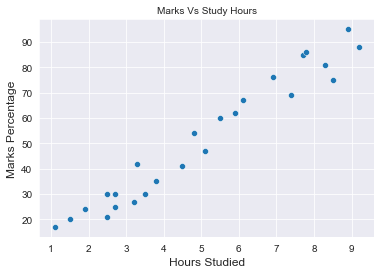

In [29]:
#visualizetion of data
sns.set_style('darkgrid')
sns.scatterplot(y= data['Scores'], x= data['Hours'])
plt.title('Marks Vs Study Hours',size=10)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

**From the above scatter plot there looks to be correlation between the 'Marks Percentage' and 'Hours Studied', Lets plot a regression line to confirm the correlation.** 

In [59]:

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

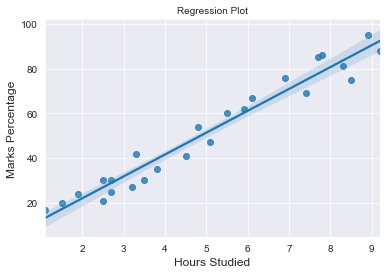

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [60]:
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=10)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(data.corr())

**It is confirmed that the variables are positively correlated.**


**Training the Model**

**Step1:- Splitting the Data**

In [ ]:
# X will take all the values except for the last column which is our dependent variable (target variable)
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

# Spliting the Data in two
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

**Step2:- Fitting the Data into the mode**

In [61]:
regression = LinearRegression()
regression.fit(train_X, train_y)
print("Model Trained")

Model Trained


**Step3:-Predicting the Perentage of Marks**

In [62]:
#hours&predictedhours
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


**Step4:-Comparing the Predicted Marks with the Actual Marks**

In [63]:
compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


**Step5:-Visually Comparing the Predicted Marks with the Actual Marks**

**Step6:-Evaluating the Model**

In [64]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))

Mean absolute error:  4.130879918502486


**Small value of Mean absolute error states that the chances of error or wrong forecasting through the model are very less.**

**What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?**

In [65]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))


Score = 93.893


**According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.89 marks.**